# Machine Learning Pipeline - Data Analysis

In the following notebooks, we will go through the implementation of each of the steps in the Machine Learning Pipeline. 

We will discuss:

1. **Data Analysis**
2. Feature Engineering
3. Feature Selection
4. Model Training
5. Obtaining Predictions / Scoring


We will use the house price dataset available on [Kaggle.com](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). See below for more details.

===================================================================================================

## Predicting Sale Price of Houses

The aim of the project is to build a machine learning model to predict the sale price of homes based on different explanatory variables describing aspects of residential houses.


### Why is this important? 

Predicting house prices is useful to identify fruitful investments or to determine whether the price advertised for a house is over or under-estimated.


### What is the objective of the machine learning model?

We aim to minimise the difference between the real price and the price estimated by our model. We will evaluate model performance with the:

1. mean squared error (mse)
2. root squared of the mean squared error (rmse)
3. r-squared (r2).


### How do I download the dataset?

**Instructions also in the lecture "Download Dataset" in section 1 of the course**

- Visit the [Kaggle Website](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

- Remember to **log in**.

- Scroll down to the bottom of the page, and click on the link **'train.csv'**, and then click the 'download' blue button towards the right of the screen, to download the dataset.

- The download the file called **'test.csv'** and save it in the directory with the notebooks.



**Note the following:**

-  You need to be logged in to Kaggle in order to download the datasets.
-  You need to accept the terms and conditions of the competition to download the dataset
-  If you save the file to the directory with the jupyter notebook, then you can run the code as it is written here.

# Data Analysis

Let's go ahead and load the dataset.

In [1]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for the yeo-johnson transformation
import scipy.stats as stats

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [2]:
# load dataset
data = pd.read_csv('train.csv')

# rows and columns of the data
print(data.shape)

# visualise the dataset
data.head()

(1200, 8)


,id,age,sex,bmi,children,smoker,region,charges
0,1,45,male,46.561704,5,no,southeast,0
1,2,18,female,23.572081,3,no,southwest,0
2,4,28,female,38.670352,0,no,southeast,0
3,5,46,female,45.614196,0,no,southwest,0
4,10,27,male,38.769610,0,no,northeast,0


In [3]:
# drop id, it is just a number given to identify each house
data.drop('id', axis=1, inplace=True)

data.shape

(1200, 7)

The house price dataset contains 1460 rows, that is, houses, and 80 columns, i.e., variables. 

79 are predictive variables and 1 is the target variable: SalePrice

## Analysis

**We will analyse the following:**

1. The target variable
2. Variable types (categorical and numerical)
3. Missing data
4. Numerical variables
    - Discrete
    - Continuous
    - Distributions
    - Transformations

5. Categorical variables
    - Cardinality
    - Rare Labels
    - Special mappings
    
6. Additional Reading Resources

## Target

Let's begin by exploring the target distribution.

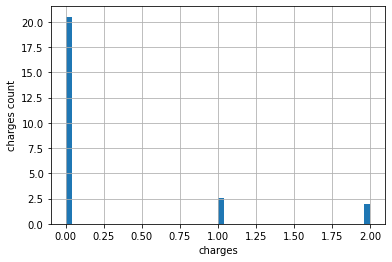

In [5]:
# histogran to evaluate target distribution

target = 'charges'

data[target].hist(bins=50, density=True)
plt.ylabel(target + ' count')
plt.xlabel(target)
plt.show()

We can see that the target is continuous, and the distribution is skewed towards the right.

We can improve the value spread with a mathematical transformation.

In [ ]:
# let's transform the target using the logarithm
# but in this data, 0 is include, so we counld not apply the logarithm transform to target

# np.log(data['pm25_mid']).hist(bins=50, density=True)
# plt.ylabel('Number of pm2.5 count')
# plt.xlabel('Log of pm2.5')
# plt.show()

Now the distribution looks more Gaussian.

## Variable Types

Next, let's identify the categorical and numerical variables

In [6]:
# let's identify the categorical variables
# we will capture those of type *object*

cat_vars = [var for var in data.columns if data[var].dtype == 'O']

# MSSubClass is also categorical by definition, despite its numeric values
# (you can find the definitions of the variables in the data_description.txt
# file available on Kaggle, in the same website where you downloaded the data)

# lets add MSSubClass to the list of categorical variables
#cat_vars = cat_vars + ['MSSubClass']

# number of categorical variables
print(len(cat_vars))
print(cat_vars)
data[cat_vars].head(10)

3
['sex', 'smoker', 'region']


,sex,smoker,region
0,male,no,southeast
1,female,no,southwest
2,female,no,southeast
3,female,no,southwest
4,male,no,northeast
5,male,no,northeast
6,male,yes,southeast
7,male,no,northwest
8,male,yes,northwest
9,female,no,northeast


In [7]:
# cast all variables as categorical
data[cat_vars] = data[cat_vars].astype('O')

In [9]:
# now let's identify the numerical variables

num_vars = [
    var for var in data.columns if var not in cat_vars and var != target
]

# number of numerical variables
print(len(num_vars))
print(num_vars)
data[num_vars].head()

3
['age', 'bmi', 'children']


,age,bmi,children
0,45,46.561704,5
1,18,23.572081,3
2,28,38.670352,0
3,46,45.614196,0
4,27,38.769610,0


In [10]:
data[num_vars].describe()

,age,bmi,children
count,1200.000000,1200.000000,1200.000000
mean,38.238333,33.665249,0.884167
std,12.708571,5.866870,1.093959
min,18.000000,22.997608,0.000000
25%,28.000000,29.741881,0.000000
50%,38.000000,33.441095,0.000000
75%,49.000000,38.575390,2.000000
max,63.000000,46.755010,5.000000


# Missing values

Let's go ahead and find out which variables of the dataset contain missing values.

In [11]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

# determine percentage of missing values (expressed as decimals)
# and display the result ordered by % of missin data

data[vars_with_na].isnull().mean().sort_values(ascending=False)

Series([], dtype: float64)

欠損値はなし

Our dataset contains a few variables with a big proportion of missing values (4 variables at the top). And some other variables with a small percentage of missing observations.

This means that to train a machine learning model with this data set, we need to impute the missing data in these variables.

We can also visualize the percentage of missing values in the variables as follows:

In [13]:
# plot

# data[vars_with_na].isnull().mean().sort_values(
#     ascending=False).plot.bar(figsize=(10, 4))
# plt.ylabel('Percentage of missing data')
# plt.axhline(y=0.90, color='r', linestyle='-')
# plt.axhline(y=0.80, color='g', linestyle='-')

# plt.show()

In [14]:
# now we can determine which variables, from those with missing data,
# are numerical and which are categorical

cat_na = [var for var in cat_vars if var in vars_with_na]
num_na = [var for var in num_vars if var in vars_with_na]

print('Number of categorical variables with na: ', len(cat_na))
print('Number of numerical variables with na: ', len(num_na))

Number of categorical variables with na:  0
Number of numerical variables with na:  0


In [15]:
num_na

[]

In [16]:
cat_na

[]

## Relationship between missing data and Sale Price

Let's evaluate the price of the house in those observations where the information is missing. We will do this for each variable that shows missing data.

In [17]:
# def analyse_na_value(df, var):

#     # copy of the dataframe, so that we do not override the original data
#     # see the link for more details about pandas.copy()
#     # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html
#     df = df.copy()

#     # let's make an interim variable that indicates 1 if the
#     # observation was missing or 0 otherwise
#     df[var] = np.where(df[var].isnull(), 1, 0)

#     # let's compare the median SalePrice in the observations where data is missing
#     # vs the observations where data is available

#     # determine the median price in the groups 1 and 0,
#     # and the standard deviation of the sale price,
#     # and we capture the results in a temporary dataset
#     tmp = df.groupby(var)['SalePrice'].agg(['mean', 'std'])

#     # plot into a bar graph
#     tmp.plot(kind="barh", y="mean", legend=False,
#              xerr="std", title="Sale Price", color='green')

#     plt.show()

In [18]:
# let's run the function on each variable with missing data

# for var in vars_with_na:
#     analyse_na_value(data, var)

In some variables, the average Sale Price in houses where the information is missing, differs from the average Sale Price in houses where information exists. This suggests that data being missing could be a good predictor of Sale Price.

# Numerical variables

Let's go ahead and find out what numerical variables we have in the dataset

In [19]:
print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
data[num_vars].head()

Number of numerical variables:  3


,age,bmi,children
0,45,46.561704,5
1,18,23.572081,3
2,28,38.670352,0
3,46,45.614196,0
4,27,38.769610,0


(ここに考察を記述する)

## Temporal variables

We have 4 year variables in the dataset:

- YearBuilt: year in which the house was built
- YearRemodAdd: year in which the house was remodeled
- GarageYrBlt: year in which a garage was built
- YrSold: year in which the house was sold

We generally don't use date variables in their raw format. Instead, we extract information from them. For example, we can capture the difference in years between the year the house was built and the year the house was sold.

In [20]:
# list of variables that contain year information

year_vars = [var for var in num_vars if 'year' in var or 'month' in var or 'day' in var]

year_vars

[]

In [21]:
# let's explore the values of these temporal variables

for var in year_vars:
    print(var, data[var].unique())
    print()

As expected, the values are years.

We can explore the evolution of the sale price with the years in which the house was sold:

In [24]:
# plot median pm2.5 vs month in which it was measured

# data.groupby('month')[target].median().plot()
# plt.ylabel(target)
# plt.show()

月とpm2.5濃度は関連があるように見受けられる。

In [25]:
# plot median pm2.5 vs day in which it was measured

# data.groupby('day')[target].median().plot()
# plt.ylabel(target)
# plt.show()

dayは、あまりpm2.5濃度と関連は無さそう。

There has been a drop in the value of the houses. That is unusual, in real life, house prices typically go up as years go by.

Let's explore a bit further. 

Let's plot the price of sale vs year in which it was built

In [ ]:
# plot median sale price vs year in which it was built

# data.groupby('YearBuilt')['SalePrice'].median().plot()
# plt.ylabel('Median House Price')


We can see that newly built / younger houses tend to be more expensive.

Could it be that lately older houses were sold? Let's have a look at that.

For this, we will capture the elapsed years between the Year variables and the year in which the house was sold:

In [ ]:
# def analyse_year_vars(df, var):
    
#     df = df.copy()
    
#     # capture difference between a year variable and year
#     # in which the house was sold
#     df[var] = df['YrSold'] - df[var]
    
#     df.groupby('YrSold')[var].median().plot()
#     plt.ylabel('Time from ' + var)
#     plt.show()
    
    
# for var in year_vars:
#     if var !='YrSold':
#         analyse_year_vars(data, var)

From the plots, we see that towards 2010, the houses sold had older garages, and had not been remodelled recently, that might explain why we see cheaper sales prices in recent years, at least in this dataset.

We can now plot instead the time since last remodelled, or time since built, and sale price, to see if there is a relationship.

In [ ]:
# def analyse_year_vars(df, var):
    
#     df = df.copy()
    
#     # capture difference between a year variable and year
#     # in which the house was sold
#     df[var] = df['YrSold'] - df[var]
    
#     plt.scatter(df[var], df['SalePrice'])
#     plt.ylabel('SalePrice')
#     plt.xlabel(var)
#     plt.show()
    
    
# for var in year_vars:
#     if var !='YrSold':
#         analyse_year_vars(data, var)

We see that there is a tendency to a decrease in price, with older houses. In other words, the longer the time between the house was built or remodeled and sale date, the lower the sale Price. 

Which makes sense, cause this means that the house will have an older look, and potentially needs repairs.

## Discrete variables

Let's go ahead and find which variables are discrete, i.e., show a finite number of values

In [26]:
#  let's male a list of discrete variables
discrete_vars = [var for var in num_vars if len(
    data[var].unique()) < 20 and var not in year_vars]

print('Number of discrete variables: ', len(discrete_vars))
print(discrete_vars)

Number of discrete variables:  1
['children']


In [27]:
# let's visualise the discrete variables

data[discrete_vars].head()

,children
0,5
1,3
2,0
3,0
4,0


These discrete variables tend to be qualifications (Qual) or grading scales (Cond), or refer to the number of rooms, or units (FullBath, GarageCars), or indicate the area of the room (KitchenAbvGr).

We expect higher prices, with bigger numbers.

Let's go ahead and analyse their contribution to the house price.

MoSold is the month in which the house was sold.

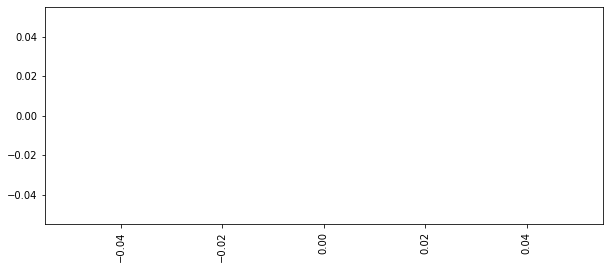

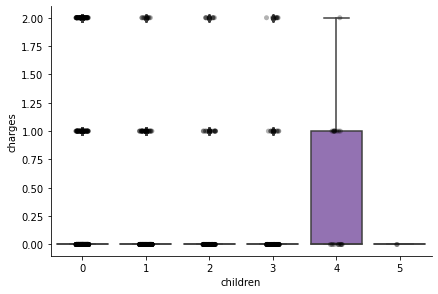

In [28]:
for var in discrete_vars:
    # make boxplot with Catplot
    sns.catplot(x=var, y=target, data=data, kind="box", height=4, aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y=target, data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()

For most discrete numerical variables, we see an increase in the sale price, with the quality, or overall condition, or  number of rooms, or surface.

For some variables, we don't see this tendency. Most likely that variable is not a good predictor of sale price.

## Continuous variables

Let's go ahead and find the distribution of the continuous variables. We will consider continuous variables to all those that are not temporal or discrete.

In [29]:
# make list of continuous variables
cont_vars = [
    var for var in num_vars if var not in discrete_vars+year_vars]

print('Number of continuous variables: ', len(cont_vars))
cont_vars

Number of continuous variables:  2


['age', 'bmi']

In [30]:
# let's visualise the continuous variables

data[cont_vars].head()

,age,bmi
0,45,46.561704
1,18,23.572081
2,28,38.670352
3,46,45.614196
4,27,38.769610


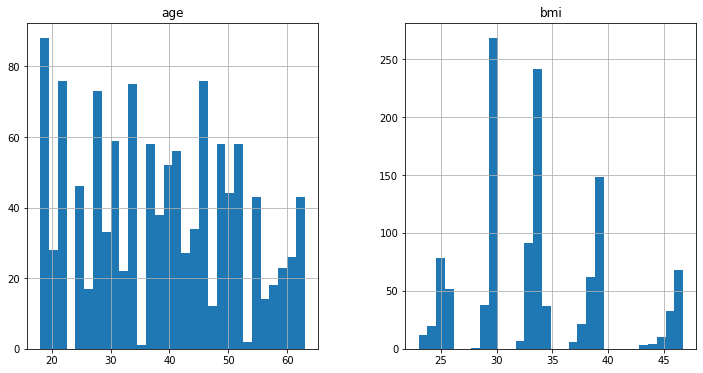

In [36]:
# lets plot histograms for all continuous variables

data[cont_vars].hist(bins=30, figsize=(12,6))
plt.show()

In [37]:
data[num_vars].describe()

,age,bmi,children
count,1200.000000,1200.000000,1200.000000
mean,38.238333,33.665249,0.884167
std,12.708571,5.866870,1.093959
min,18.000000,22.997608,0.000000
25%,28.000000,29.741881,0.000000
50%,38.000000,33.441095,0.000000
75%,49.000000,38.575390,2.000000
max,63.000000,46.755010,5.000000


The variables are not normally distributed. And there are a particular few that are extremely skewed like 3SsnPorch, ScreenPorch and MiscVal.

Sometimes, transforming the variables to improve the value spread, improves the model performance. But it is unlikely that a transformation will help change the distribution of the super skewed variables dramatically.

We can apply a Yeo-Johnson transformation to variables like LotFrontage, LotArea, BsmUnfSF, and a binary transformation to variables like 3SsnPorch, ScreenPorch and MiscVal.

Let's go ahead and do that.

In [38]:
# first make a list with the super skewed variables
# for later

skewed = [
    'age', 'bmi'
]

In [39]:
# capture the remaining continuous variables

cont_vars = [
    var for var in num_vars if var not in skewed
#     'LotFrontage',
#     'LotArea',
#     'MasVnrArea',
#     'BsmtFinSF1',
#     'BsmtUnfSF',
#     'TotalBsmtSF',
#     '1stFlrSF',
#     '2ndFlrSF',
#     'GrLivArea',
#     'GarageArea',
#     'WoodDeckSF',
#     'OpenPorchSF',
]

cont_vars = [var for var in cont_vars if var not in skewed]
print(len(cont_vars))
cont_vars


1


['children']

### Yeo-Johnson transformation

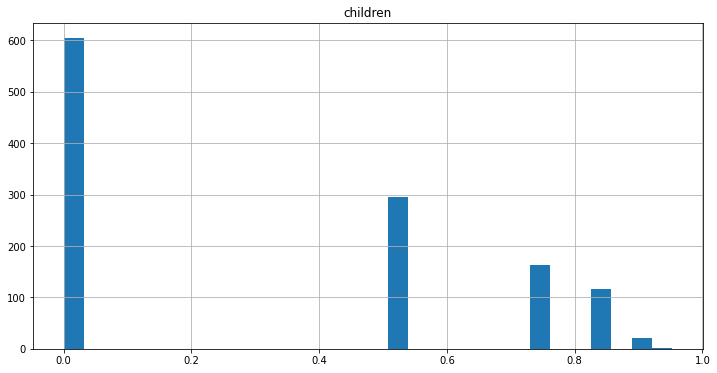

In [41]:
# Let's go ahead and analyse the distributions of the variables
# after applying a yeo-johnson transformation

# temporary copy of the data
tmp = data.copy()

for var in cont_vars:

    # transform the variable - yeo-johsnon
    tmp[var], param = stats.yeojohnson(data[var])

    
# plot the histograms of the transformed variables
tmp[cont_vars].hist(bins=30, figsize=(12,6))
plt.show()

For LotFrontage and MasVnrArea the transformation did not do an amazing job. 

For the others, the values seem to be spread more evenly in the range.

Whether this helps improve the predictive power, remains to be seen. To determine if this is the case, we should train a model with the original values and one with the transformed values, and determine model performance, and feature importance. But that escapes the scope of this course.

Here, we will do a quick visual exploration here instead:

/opt/conda/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


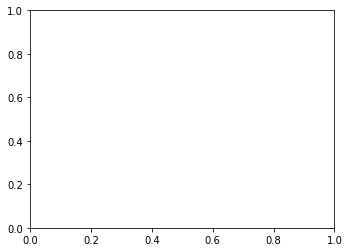

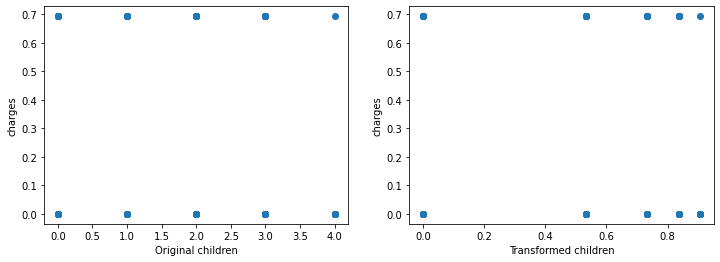

In [43]:
# let's plot the original or transformed variables
# vs sale price, and see if there is a relationship

for var in cont_vars:
    
    plt.figure(figsize=(12,4))
    
    # plot the original variable vs sale price    
    plt.subplot(1, 2, 1)
    plt.scatter(data[var], np.log(data[target]))
    plt.ylabel(target)
    plt.xlabel('Original ' + var)

    # plot transformed variable vs sale price
    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], np.log(tmp[target]))
    plt.ylabel(target)
    plt.xlabel('Transformed ' + var)
                
    plt.show()

By eye, the transformations seems to improve the relationship only for LotArea.

Let's try a different transformation now. Most variables contain the value 0, and thus we can't apply the logarithmic transformation, but we can certainly do that for the following variables:

 ["LotFrontage", "1stFlrSF", "GrLivArea"]
 
 So let's do that and see if that changes the variable distribution and its relationship with the target.
 
 ### Logarithmic transformation

In [35]:
# # Let's go ahead and analyse the distributions of these variables
# # after applying a logarithmic transformation

# tmp = data.copy()

# for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:

#     # transform the variable with logarithm
#     tmp[var] = np.log(data[var])
    
# tmp[["LotFrontage", "1stFlrSF", "GrLivArea"]].hist(bins=30)
# plt.show()

The distribution of the variables are now more "Gaussian" looking.

Let's go ahead and evaluate their relationship with the target.

In [36]:
# # let's plot the original or transformed variables
# # vs sale price, and see if there is a relationship

# for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:
    
#     plt.figure(figsize=(12,4))
    
#     # plot the original variable vs sale price    
#     plt.subplot(1, 2, 1)
#     plt.scatter(data[var], np.log(data['SalePrice']))
#     plt.ylabel('Sale Price')
#     plt.xlabel('Original ' + var)

#     # plot transformed variable vs sale price
#     plt.subplot(1, 2, 2)
#     plt.scatter(tmp[var], np.log(tmp['SalePrice']))
#     plt.ylabel('Sale Price')
#     plt.xlabel('Transformed ' + var)
                
#     plt.show()

The transformed variables have a better spread of the values, which may in turn, help make better predictions.

## Skewed variables

Let's transform them into binary variables and see how predictive they are:

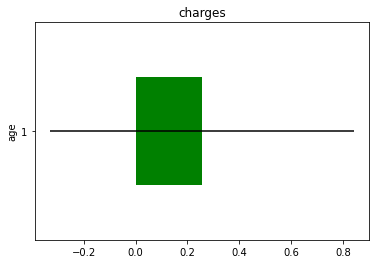

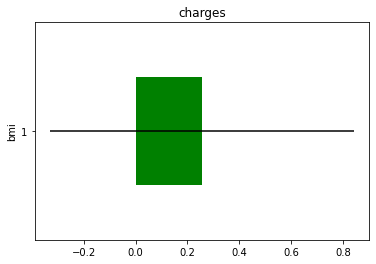

In [44]:
for var in skewed:
    
    tmp = data.copy()
    
    # map the variable values into 0 and 1
    tmp[var] = np.where(data[var]==0, 0, 1)
    
    # determine mean sale price in the mapped values
    tmp = tmp.groupby(var)[target].agg(['mean', 'std'])

    # plot into a bar graph
    tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title=target, color='green')

    plt.show()

There seem to be a difference in Sale Price in the mapped values, but the confidence intervals overlap, so most likely this is not significant or predictive.

# Categorical variables

Let's go ahead and analyse the categorical variables present in the dataset.

In [45]:
print('Number of categorical variables: ', len(cat_vars))

Number of categorical variables:  3


In [46]:
# let's visualise the values of the categorical variables
data[cat_vars].head()

,sex,smoker,region
0,male,no,southeast
1,female,no,southwest
2,female,no,southeast
3,female,no,southwest
4,male,no,northeast


## Number of labels: cardinality

Let's evaluate how many different categories are present in each of the variables.

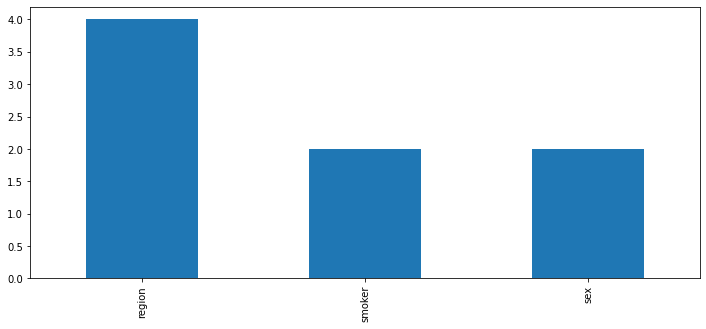

In [47]:
# we count unique categories with pandas unique() 
# and then plot them in descending order

data[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))
plt.show()

All the categorical variables show low cardinality, this means that they have only few different labels. That is good as we won't need to tackle cardinality during our feature engineering lecture.

## Quality variables

There are a number of variables that refer to the quality of some aspect of the house, for example the garage, or the fence, or the kitchen. I will replace these categories by numbers increasing with the quality of the place or room.

The mappings can be obtained from the Kaggle Website. One example:

- Ex = Excellent
- Gd = Good
- TA = Average/Typical
- Fa =	Fair
- Po = Poor

In [49]:
# # re-map strings to numbers, which determine quality

# qual_mappings = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0}

qual_vars = [
#     'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
#              'HeatingQC', 'KitchenQual', 'FireplaceQu',
#              'GarageQual', 'GarageCond',
            ]

# for var in qual_vars:
#     data[var] = data[var].map(qual_mappings)

In [ ]:
# exposure_mappings = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4, 'Missing': 0, 'NA': 0}

# var = 'BsmtExposure'

# data[var] = data[var].map(exposure_mappings)

In [ ]:
# finish_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

# finish_vars = ['BsmtFinType1', 'BsmtFinType2']

# for var in finish_vars:
#     data[var] = data[var].map(finish_mappings)

In [ ]:
# garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

# var = 'GarageFinish'

# data[var] = data[var].map(garage_mappings)

In [ ]:
# fence_mappings = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

# var = 'Fence'

# data[var] = data[var].map(fence_mappings)

In [ ]:
# # capture all quality variables

# qual_vars  = qual_vars + finish_vars + ['BsmtExposure','GarageFinish','Fence']

In [ ]:
# # now let's plot the house mean sale price based on the quality of the 
# # various attributes

# for var in qual_vars:
#     # make boxplot with Catplot
#     sns.catplot(x=var, y='SalePrice', data=data, kind="box", height=4, aspect=1.5)
#     # add data points to boxplot with stripplot
#     sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.1, alpha=0.3, color='k')
#     plt.show()

For most attributes, the increase in the house price with the value of the variable, is quite clear.

In [50]:
# capture the remaining categorical variables
# (those that we did not re-map)

cat_others = [
    var for var in cat_vars if var not in qual_vars
]

len(cat_others)

3

## Rare labels:

Let's go ahead and investigate now if there are labels that are present only in a small number of houses:

In [51]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()

    # determine the % of observations per category
    tmp = df.groupby(var)[target].count() / len(df)

    # return categories that are rare
    return tmp[tmp < rare_perc]

# print categories that are present in less than
# 1 % of the observations

for var in cat_others:
    print(analyse_rare_labels(data, var, 0.01))
    print()

Series([], Name: charges, dtype: float64)

Series([], Name: charges, dtype: float64)

Series([], Name: charges, dtype: float64)



Some of the categorical variables show multiple labels that are present in less than 1% of the houses. 

Labels that are under-represented in the dataset tend to cause over-fitting of machine learning models. 

That is why we want to remove them.

Finally, we want to explore the relationship between the categories of the different variables and the house sale price:

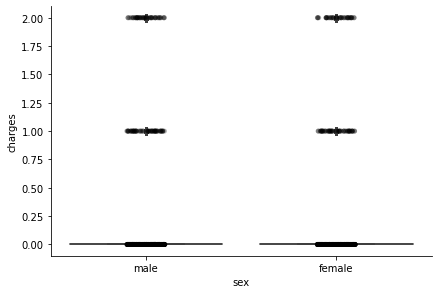

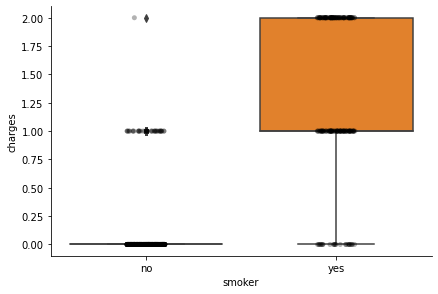

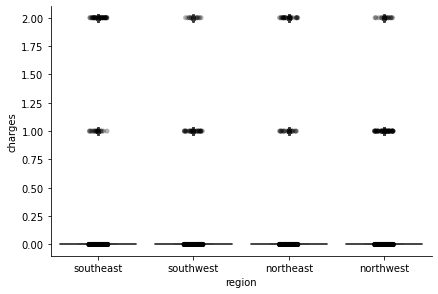

In [52]:
for var in cat_others:
    # make boxplot with Catplot
    sns.catplot(x=var, y=target, data=data, kind="box", height=4, aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y=target, data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()

Clearly, the categories give information on the SalePrice, as different categories show different median sale prices.

**Disclaimer:**

There is certainly more that can be done to understand the nature of this data and the relationship of these variables with the target, SalePrice. And also about the distribution of the variables themselves.

However, we hope that through this notebook we gave you a flavour of what data analysis looks like.

# Additional Resources

- [Feature Engineering for Machine Learning](https://www.udemy.com/course/feature-engineering-for-machine-learning/?referralCode=A855148E05283015CF06) - Online Course
- [Packt Feature Engineering Cookbook](https://www.packtpub.com/data/python-feature-engineering-cookbook) - Book
- [Predict house price with Feature-engine](https://www.kaggle.com/solegalli/predict-house-price-with-feature-engine) - Kaggle kernel
- [Comprehensive data exploration with Python](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python) - Kaggle kernel
- [How I made top 0.3% on a Kaggle competition](https://www.kaggle.com/lavanyashukla01/how-i-made-top-0-3-on-a-kaggle-competition) - Kaggle kernel

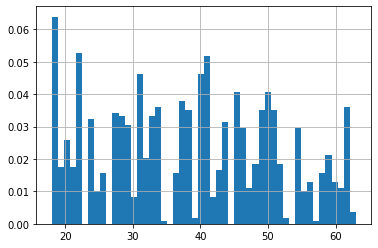

In [56]:
data['age'].hist(bins=50, density=True)
plt.show()

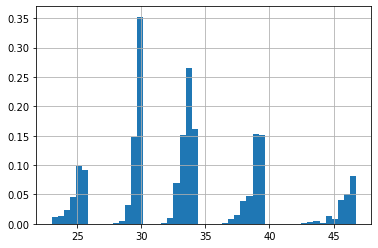

In [57]:
data['bmi'].hist(bins=50, density=True)
plt.show()

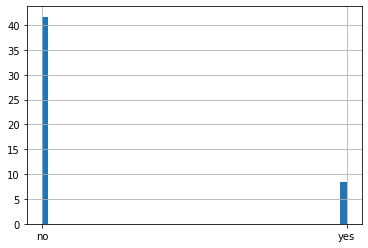

In [58]:
data['smoker'].hist(bins=50, density=True)
plt.show()

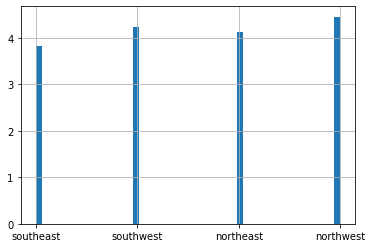

In [59]:
data['region'].hist(bins=50, density=True)
plt.show()

In [60]:
data['region'].value_counts()

northwest    321
southwest    305
northeast    298
southeast    276
Name: region, dtype: int64